In [2]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pandas as pd

In [3]:
from pyspark.sql.functions import upper, lower, col

In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import seaborn as sns

In [5]:
directory = "/home/soojin/data"
filename  = "coupang_product_list.csv"

In [6]:
# 쿠팡 전체 데이터 불러오기 
coupang_sdf = spark.read.csv(f"file:///{directory}/{filename}", header=True, inferSchema=True)
coupang_sdf

DataFrame[_c0: int, category: string, ranking: int, name: string, price: string, rating: string, review: double, date: string]

In [7]:
# 전체 데이터 확인
coupang_sdf.show()

+---+--------+-------+----------------------------------+------+------+------+----------+
|_c0|category|ranking|                              name| price|rating|review|      date|
+---+--------+-------+----------------------------------+------+------+------+----------+
|  1|    텐트|      1| 패스트캠프 베이직3 원터치 텐트...| 47400|   4.5|5102.0|2022-06-13|
|  2|    텐트|      2|빈슨메시프 티클라 프리미엄 원터...| 49830|   4.5|2006.0|2022-06-13|
|  3|    텐트|      3|빈슨메시프 티클라 프리미엄 원터...| 53280|   4.5|2006.0|2022-06-13|
|  4|    텐트|      4|스위스마운틴 헥사돔 원터치 텐트...| 77500|   4.5|1881.0|2022-06-13|
|  5|    텐트|      5| 무로 아웃도어 원터치 방수 차박...| 65270|   5.0| 264.0|2022-06-13|
|  6|    텐트|      6| 몽크로스 팝업 원터치 그늘막 텐...| 40500|   4.5| 208.0|2022-06-13|
|  7|    텐트|      7|스위스마운틴 헥사돔 원터치 텐트...| 77500|   4.5|1881.0|2022-06-13|
|  8|    텐트|      8|빈슨메시프 티클라 프리미엄 원터...| 35050|   4.5| 501.0|2022-06-13|
|  9|    텐트|      9| 버팔로 프리미엄 뉴 프리마 팝업...|101150|   4.5|2026.0|2022-06-13|
| 10|    텐트|     10| 그라비티캠프 원터치 캠핑 텐트,...|211000|   4.5| 894

22/06/20 17:11:09 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , category, ranking, name, price, rating, review, date
 Schema: _c0, category, ranking, name, price, rating, review, date
Expected: _c0 but found: 
CSV file: file:///home/soojin/data/coupang_product_list.csv


In [8]:
# 필요없는 컬럼 삭제
coupang_sdf = coupang_sdf.drop('date')

In [9]:
coupang_sdf.show()

+---+--------+-------+----------------------------------+------+------+------+
|_c0|category|ranking|                              name| price|rating|review|
+---+--------+-------+----------------------------------+------+------+------+
|  1|    텐트|      1| 패스트캠프 베이직3 원터치 텐트...| 47400|   4.5|5102.0|
|  2|    텐트|      2|빈슨메시프 티클라 프리미엄 원터...| 49830|   4.5|2006.0|
|  3|    텐트|      3|빈슨메시프 티클라 프리미엄 원터...| 53280|   4.5|2006.0|
|  4|    텐트|      4|스위스마운틴 헥사돔 원터치 텐트...| 77500|   4.5|1881.0|
|  5|    텐트|      5| 무로 아웃도어 원터치 방수 차박...| 65270|   5.0| 264.0|
|  6|    텐트|      6| 몽크로스 팝업 원터치 그늘막 텐...| 40500|   4.5| 208.0|
|  7|    텐트|      7|스위스마운틴 헥사돔 원터치 텐트...| 77500|   4.5|1881.0|
|  8|    텐트|      8|빈슨메시프 티클라 프리미엄 원터...| 35050|   4.5| 501.0|
|  9|    텐트|      9| 버팔로 프리미엄 뉴 프리마 팝업...|101150|   4.5|2026.0|
| 10|    텐트|     10| 그라비티캠프 원터치 캠핑 텐트,...|211000|   4.5| 894.0|
| 11|    텐트|     11|빈슨메시프 티클라 프리미엄 원터...| 53280|   4.5|2006.0|
| 12|    텐트|     12|빈슨메시프 티클라 프리미엄 원터...| 49830|   4.5|2006.0|
| 

22/06/20 17:11:10 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , category, ranking, name, price, rating, review
 Schema: _c0, category, ranking, name, price, rating, review
Expected: _c0 but found: 
CSV file: file:///home/soojin/data/coupang_product_list.csv


In [10]:
# 스키마의 타입 확인
coupang_sdf.dtypes

[('_c0', 'int'),
 ('category', 'string'),
 ('ranking', 'int'),
 ('name', 'string'),
 ('price', 'string'),
 ('rating', 'string'),
 ('review', 'double')]

In [11]:
# 가격 컬럼 int로 변경
coupang_sdf = coupang_sdf.withColumn('price', col('price').cast('Integer'))

In [12]:
coupang_sdf.dtypes

[('_c0', 'int'),
 ('category', 'string'),
 ('ranking', 'int'),
 ('name', 'string'),
 ('price', 'int'),
 ('rating', 'string'),
 ('review', 'double')]

In [13]:
coupang_sdf.createOrReplaceTempView("coupang_data")

In [14]:
# 데이터 전처리 - 중복 처리
# 전체 데이터를 리뷰수 내림차순으로 나열했을 때, 
# 동일 상품이 여러개 등록되있는 경우가 있었음. 색상, 무게, 개수 등 옵션이 다르고 리뷰수는 같음.
# 상품명 앞 세 단어가 같고 가격도 같은 상품은 동일 제품이라고 간주하고 삭제함

In [15]:
# 상품명만 따로 두고

query="""
SELECT _c0, name, price
FROM coupang_data
"""

spark.sql(query).show()

+---+----------------------------------+------+
|_c0|                              name| price|
+---+----------------------------------+------+
|  1| 패스트캠프 베이직3 원터치 텐트...| 47400|
|  2|빈슨메시프 티클라 프리미엄 원터...| 49830|
|  3|빈슨메시프 티클라 프리미엄 원터...| 53280|
|  4|스위스마운틴 헥사돔 원터치 텐트...| 77500|
|  5| 무로 아웃도어 원터치 방수 차박...| 65270|
|  6| 몽크로스 팝업 원터치 그늘막 텐...| 40500|
|  7|스위스마운틴 헥사돔 원터치 텐트...| 77500|
|  8|빈슨메시프 티클라 프리미엄 원터...| 35050|
|  9| 버팔로 프리미엄 뉴 프리마 팝업...|101150|
| 10| 그라비티캠프 원터치 캠핑 텐트,...|211000|
| 11|빈슨메시프 티클라 프리미엄 원터...| 53280|
| 12|빈슨메시프 티클라 프리미엄 원터...| 49830|
| 13| 패스트캠프 원터치 팝업 텐트 메...| 64680|
| 14|   알뜨리 피크닉 원터치 텐트 + ...| 28710|
| 15| 알뜨리 피크닉 원터치 텐트 대형...| 51200|
| 16| 몽크로스 팝업 원터치 그늘막 텐...| 49900|
| 17| 그라비티캠프 원터치 캠핑 텐트,...| 72650|
| 18| 조아캠프 원터치텐트, 텐트(브라...| 27150|
| 19| 버팔로 프리미엄 뉴 프리마 팝업...| 85500|
| 20| 패스트캠프 원터치텐트 베이직3 ...| 52150|
+---+----------------------------------+------+
only showing top 20 rows



22/06/20 17:11:11 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , name, price
 Schema: _c0, name, price
Expected: _c0 but found: 
CSV file: file:///home/soojin/data/coupang_product_list.csv


In [16]:
# 카테고리 설정, 브랜드 네임 추출

query="""
SELECT
    ranking,
    category,
    SUBSTRING_INDEX(name, ' ', 1) as brand_name
FROM coupang_data
WHERE category='텐트'
ORDER BY ranking 
"""

텐트_brand_list = spark.sql(query)

In [17]:
텐트_brand_list.show()

+-------+--------+------------+
|ranking|category|  brand_name|
+-------+--------+------------+
|      1|    텐트|  패스트캠프|
|      2|    텐트|  빈슨메시프|
|      3|    텐트|  빈슨메시프|
|      4|    텐트|스위스마운틴|
|      5|    텐트|        무로|
|      6|    텐트|    몽크로스|
|      7|    텐트|스위스마운틴|
|      8|    텐트|  빈슨메시프|
|      9|    텐트|      버팔로|
|     10|    텐트|그라비티캠프|
|     11|    텐트|  빈슨메시프|
|     12|    텐트|  빈슨메시프|
|     13|    텐트|  패스트캠프|
|     14|    텐트|      알뜨리|
|     15|    텐트|      알뜨리|
|     16|    텐트|    몽크로스|
|     17|    텐트|그라비티캠프|
|     18|    텐트|    조아캠프|
|     19|    텐트|      버팔로|
|     20|    텐트|  패스트캠프|
+-------+--------+------------+
only showing top 20 rows



In [18]:
# 브랜드 네임 중복 제거
c1_brand_list = 텐트_brand_list.dropDuplicates(['brand_name'])

In [19]:
c1_brand_list.createOrReplaceTempView("brand_c1")

In [20]:
# 브랜드 순위 최종 결과

query="""
SELECT *
FROM brand_c1
ORDER BY ranking 
"""

spark.sql(query).show()

+-------+--------+------------+
|ranking|category|  brand_name|
+-------+--------+------------+
|      1|    텐트|  패스트캠프|
|      2|    텐트|  빈슨메시프|
|      4|    텐트|스위스마운틴|
|      5|    텐트|        무로|
|      6|    텐트|    몽크로스|
|      9|    텐트|      버팔로|
|     10|    텐트|그라비티캠프|
|     14|    텐트|      알뜨리|
|     18|    텐트|    조아캠프|
|     22|    텐트|      아웃팅|
|     25|    텐트|    아이두젠|
|     26|    텐트|    어반캠퍼|
|     31|    텐트|        HERC|
|     32|    텐트|      핏테라|
|     34|    텐트|         MLB|
|     36|    텐트|      카즈미|
|     40|    텐트|    데카트론|
|     51|    텐트|      미어캣|
|     54|    텐트|    브리즈문|
|     56|    텐트|        카템|
+-------+--------+------------+
only showing top 20 rows



In [21]:
# 카테고리별로 브랜드 순위 결과 추출 

In [22]:
# 앞에 세 단어만 추출한 칼럼 추가

query="""
SELECT 
    *,
    SUBSTRING_INDEX(name, ' ', 3) as duplicate_name
FROM coupang_data
"""

coupang_dup = spark.sql(query)

In [23]:
coupang_dup.show()

+---+--------+-------+----------------------------------+------+------+------+----------------------------------+
|_c0|category|ranking|                              name| price|rating|review|                    duplicate_name|
+---+--------+-------+----------------------------------+------+------+------+----------------------------------+
|  1|    텐트|      1| 패스트캠프 베이직3 원터치 텐트...| 47400|   4.5|5102.0|         패스트캠프 베이직3 원터치|
|  2|    텐트|      2|빈슨메시프 티클라 프리미엄 원터...| 49830|   4.5|2006.0|        빈슨메시프 티클라 프리미엄|
|  3|    텐트|      3|빈슨메시프 티클라 프리미엄 원터...| 53280|   4.5|2006.0|        빈슨메시프 티클라 프리미엄|
|  4|    텐트|      4|스위스마운틴 헥사돔 원터치 텐트...| 77500|   4.5|1881.0|        스위스마운틴 헥사돔 원터치|
|  5|    텐트|      5| 무로 아웃도어 원터치 방수 차박...| 65270|   5.0| 264.0|              무로 아웃도어 원터치|
|  6|    텐트|      6| 몽크로스 팝업 원터치 그늘막 텐...| 40500|   4.5| 208.0|              몽크로스 팝업 원터치|
|  7|    텐트|      7|스위스마운틴 헥사돔 원터치 텐트...| 77500|   4.5|1881.0|        스위스마운틴 헥사돔 원터치|
|  8|    텐트|      8|빈슨메시프 티클라 프리미엄 원터...| 3505

22/06/20 17:11:19 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , category, ranking, name, price, rating, review
 Schema: _c0, category, ranking, name, price, rating, review
Expected: _c0 but found: 
CSV file: file:///home/soojin/data/coupang_product_list.csv


In [24]:
# 중복 상품명 제거 1 (상품이름, 가격)
coupang_dup.dropDuplicates(['duplicate_name', 'price']).show()

22/06/20 17:11:20 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , category, ranking, name, price, rating, review
 Schema: _c0, category, ranking, name, price, rating, review
Expected: _c0 but found: 
CSV file: file:///home/soojin/data/coupang_product_list.csv


+---+---------------+-------+---------------------------------+------+------+-------+--------------------------------+
|_c0|       category|ranking|                             name| price|rating| review|                  duplicate_name|
+---+---------------+-------+---------------------------------+------+------+-------+--------------------------------+
|636|      랜턴/조명|    637|   """당일출고"" 자동차 스위치...|  null| 13000|    5.0| """당일출고"" 자동차 스위치달린|
|360|       캠핑공구|    361|     "신 성 * 국산 ""캠핑전선"...|  null|  50m"|61900.0|                        "신 성 *|
|262| 침낭/매트/해먹|    263|  #TV홈쇼핑정품 #컴인쇼핑 배연...| 58900|   4.0|   29.0|  #TV홈쇼핑정품 #컴인쇼핑 배연정|
|491|    타프/그늘막|    492| #국산#감성#휴대용#파라솔 받침...| 24000|   4.5|   26.0|#국산#감성#휴대용#파라솔 받침...|
|711|      랜턴/조명|    712|    #플래닛 충전식 전구형 led ...| 10800|   5.0|    7.0|           #플래닛 충전식 전구형|
|415|      랜턴/조명|    416|  (16시전주문시 당일출고)캠핑 ...| 16900|   5.0|    1.0|(16시전주문시 당일출고)캠핑 랜턴|
|650|      랜턴/조명|    651|     (4시 당일출고) USB 충전식...| 24500|   4.5|    5.0|    

In [25]:
dup1 = coupang_dup.dropDuplicates(['duplicate_name', 'price'])

In [26]:
# 중복 상품명 제거 2 (상품이름, 리뷰)
coupang_dup.dropDuplicates(['duplicate_name', 'review']).show()

22/06/20 17:11:23 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , category, ranking, name, price, rating, review
 Schema: _c0, category, ranking, name, price, rating, review
Expected: _c0 but found: 
CSV file: file:///home/soojin/data/coupang_product_list.csv


+---+---------------+-------+---------------------------------+------+------+-------+--------------------------------+
|_c0|       category|ranking|                             name| price|rating| review|                  duplicate_name|
+---+---------------+-------+---------------------------------+------+------+-------+--------------------------------+
|636|      랜턴/조명|    637|   """당일출고"" 자동차 스위치...|  null| 13000|    5.0| """당일출고"" 자동차 스위치달린|
|360|       캠핑공구|    361|     "신 성 * 국산 ""캠핑전선"...|  null|  50m"|61900.0|                        "신 성 *|
|262| 침낭/매트/해먹|    263|  #TV홈쇼핑정품 #컴인쇼핑 배연...| 58900|   4.0|   29.0|  #TV홈쇼핑정품 #컴인쇼핑 배연정|
|491|    타프/그늘막|    492| #국산#감성#휴대용#파라솔 받침...| 24000|   4.5|   26.0|#국산#감성#휴대용#파라솔 받침...|
|711|      랜턴/조명|    712|    #플래닛 충전식 전구형 led ...| 10800|   5.0|    7.0|           #플래닛 충전식 전구형|
|715|      랜턴/조명|    716|    #플래닛 충전식 전구형 led ...| 10800|   4.5|  105.0|           #플래닛 충전식 전구형|
|415|      랜턴/조명|    416|  (16시전주문시 당일출고)캠핑 ...| 16900|   5.0|    1.0|(

In [27]:
dup2 = coupang_dup.dropDuplicates(['duplicate_name', 'review'])

In [28]:
coupang_df1 = dup1.toPandas()

22/06/20 17:11:28 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , category, ranking, name, price, rating, review
 Schema: _c0, category, ranking, name, price, rating, review
Expected: _c0 but found: 
CSV file: file:///home/soojin/data/coupang_product_list.csv


In [29]:
coupang_df1

,_c0,category,ranking,name,price,rating,review,duplicate_name
0,636,랜턴/조명,637,"""""""당일출고"""" 자동차 스위치달린 트렁크등 LED바 차박등 캠핑등 12V",NaN,13000,5.0,"""""""당일출고"""" 자동차 스위치달린"
1,360,캠핑공구,361,"""신 성 * 국산 """"캠핑전선"""" 전기연장선[ 1.5SQ ]",NaN,"50m""",61900.0,"""신 성 *"
2,262,침낭/매트/해먹,263,#TV홈쇼핑정품 #컴인쇼핑 배연정 배일집 스피드 요고바라 에어 자동충전 자충 매트 ...,58900.0,4.0,29.0,#TV홈쇼핑정품 #컴인쇼핑 배연정
3,491,타프/그늘막,492,"#국산#감성#휴대용#파라솔 받침대/물통 베이스, 회색사각, 짧은 봉",24000.0,4.5,26.0,"#국산#감성#휴대용#파라솔 받침대/물통 베이스,"
4,711,랜턴/조명,712,"#플래닛 충전식 전구형 led 랜턴 야외 작업등 캠핑 전등, 옐로우",10800.0,5.0,7.0,#플래닛 충전식 전구형
...,...,...,...,...,...,...,...,...
7762,548,텐트,548,"힐맨 캠핑텐트 2~3인용 3~4인용, 레드",88100.0,4.0,1.0,힐맨 캠핑텐트 2~3인용
7763,561,텐트,561,"힐맨 클라우드 PLUS 텐트, 옐로우, 2인용",153160.0,5.0,3.0,힐맨 클라우드 PLUS
7764,148,텐트,148,"힐맨 클라우드 UP SMART 텐트, 옐로우, 2인용",93970.0,4.5,183.0,힐맨 클라우드 UP
7765,435,텐트,435,"힐맨 클라우드2 L 텐트, 레드, 2인용",116160.0,4.5,40.0,힐맨 클라우드2 L


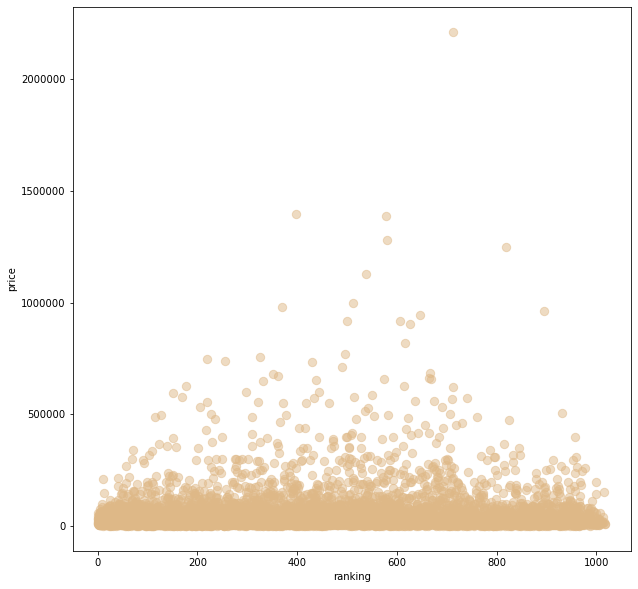

In [30]:
# 판매량 순위와 가격 시각화

plt.figure(figsize=(10, 10))

plt.scatter(coupang_df1["ranking"], coupang_df1["price"], color='#deb887', s=70, alpha=0.5)

plt.xlabel("ranking")
plt.ylabel("price")

plt.gca().set_facecolor('#00ff0000')

plt.show()

In [31]:
coupang_df2 = dup2.toPandas()

22/06/20 17:11:32 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , category, ranking, name, price, rating, review
 Schema: _c0, category, ranking, name, price, rating, review
Expected: _c0 but found: 
CSV file: file:///home/soojin/data/coupang_product_list.csv


In [32]:
coupang_df2

,_c0,category,ranking,name,price,rating,review,duplicate_name
0,636,랜턴/조명,637,"""""""당일출고"""" 자동차 스위치달린 트렁크등 LED바 차박등 캠핑등 12V",NaN,13000,5.0,"""""""당일출고"""" 자동차 스위치달린"
1,360,캠핑공구,361,"""신 성 * 국산 """"캠핑전선"""" 전기연장선[ 1.5SQ ]",NaN,"50m""",61900.0,"""신 성 *"
2,262,침낭/매트/해먹,263,#TV홈쇼핑정품 #컴인쇼핑 배연정 배일집 스피드 요고바라 에어 자동충전 자충 매트 ...,58900.0,4.0,29.0,#TV홈쇼핑정품 #컴인쇼핑 배연정
3,491,타프/그늘막,492,"#국산#감성#휴대용#파라솔 받침대/물통 베이스, 회색사각, 짧은 봉",24000.0,4.5,26.0,"#국산#감성#휴대용#파라솔 받침대/물통 베이스,"
4,711,랜턴/조명,712,"#플래닛 충전식 전구형 led 랜턴 야외 작업등 캠핑 전등, 옐로우",10800.0,5.0,7.0,#플래닛 충전식 전구형
...,...,...,...,...,...,...,...,...
7238,548,텐트,548,"힐맨 캠핑텐트 2~3인용 3~4인용, 레드",88100.0,4.0,1.0,힐맨 캠핑텐트 2~3인용
7239,561,텐트,561,"힐맨 클라우드 PLUS 텐트, 옐로우, 2인용",153160.0,5.0,3.0,힐맨 클라우드 PLUS
7240,148,텐트,148,"힐맨 클라우드 UP SMART 텐트, 옐로우, 2인용",93970.0,4.5,183.0,힐맨 클라우드 UP
7241,435,텐트,435,"힐맨 클라우드2 L 텐트, 레드, 2인용",116160.0,4.5,40.0,힐맨 클라우드2 L


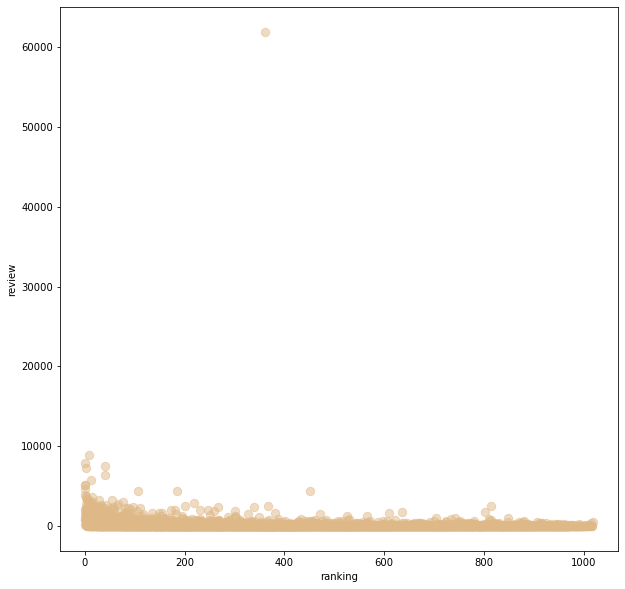

In [33]:
# 판매량 순위와 리뷰수 시각화

plt.figure(figsize=(10, 10))

plt.scatter(coupang_df2["ranking"], coupang_df2["review"], color='#deb887', s=70, alpha=0.5)

plt.xlabel("ranking")
plt.ylabel("review")

plt.gca().set_facecolor('#00ff0000')

plt.show()

In [34]:
# 각 카테고리 별로 나눠서 시각화
ca1_df = coupang_df2[coupang_df2["category"] == "텐트"]

In [35]:
ca1_price_df = ca1_df.sort_values(by="price")

In [36]:
ca1_price_df

,_c0,category,ranking,name,price,rating,review,duplicate_name
4485,662,텐트,662,"울트라패션 인디언텐트 인테리어 아이방꾸미기 마이룸 캠핑소품, 텐트고정나사",1000.0,3.0,7.0,울트라패션 인디언텐트 인테리어
759,600,텐트,600,"[UFO] 스텐 텐트 고정고리(5개입), 단품",4000.0,4.5,9.0,[UFO] 스텐 텐트
807,594,텐트,594,[로티] 로티캠프 네이처 팝업 원터치텐트 3-4인용 그라운드시트,7900.0,5.0,1.0,[로티] 로티캠프 네이처
6492,672,텐트,672,텐트&타프전용 4단분리형폴대 총길이200cm 텐트폴대 타프 그늘막 폴 스크린 스텐 ...,8500.0,4.5,5.0,텐트&타프전용 4단분리형폴대 총길이200cm
4601,365,텐트,365,육각 돔 캠핑텐트 전용 캐노피 폴대,9460.0,4.5,15.0,육각 돔 캠핑텐트
...,...,...,...,...,...,...,...,...
784,370,텐트,370,[당일발송A/S가능] 도그독 면 에어텐트 패밀리 7~8인용 (85만원상당 추가증정)...,980000.0,5.0,5.0,[당일발송A/S가능] 도그독 면
619,511,텐트,511,SUV 자동차 루프탑텐트 캠핑용 차박도킹 지붕 하드쉘 차량위 3초자동펼침 3인텐트 ...,998000.0,4.5,13.0,SUV 자동차 루프탑텐트
3839,538,텐트,538,승용차 SUV 루프탑텐트 고급형 동급최대공간 차박캠핑 자동차 차지붕 하드탑 하드쉘 ...,1128000.0,3.0,2.0,승용차 SUV 루프탑텐트
2338,581,텐트,581,"루프탑텐트 오토매틱 전자동 트레일 세단 하드케이스 캠핑, 이중 망사 블랙(화이트 하...",1280000.0,4.0,1.0,루프탑텐트 오토매틱 전자동


In [37]:
# 4 구간으로 나눔
ca1_price_df['label'] = pd.qcut(ca1_price_df["price"], 4, labels=[1, 2, 3, 4])

In [38]:
ca1_price_df

,_c0,category,ranking,name,price,rating,review,duplicate_name,label
4485,662,텐트,662,"울트라패션 인디언텐트 인테리어 아이방꾸미기 마이룸 캠핑소품, 텐트고정나사",1000.0,3.0,7.0,울트라패션 인디언텐트 인테리어,1
759,600,텐트,600,"[UFO] 스텐 텐트 고정고리(5개입), 단품",4000.0,4.5,9.0,[UFO] 스텐 텐트,1
807,594,텐트,594,[로티] 로티캠프 네이처 팝업 원터치텐트 3-4인용 그라운드시트,7900.0,5.0,1.0,[로티] 로티캠프 네이처,1
6492,672,텐트,672,텐트&타프전용 4단분리형폴대 총길이200cm 텐트폴대 타프 그늘막 폴 스크린 스텐 ...,8500.0,4.5,5.0,텐트&타프전용 4단분리형폴대 총길이200cm,1
4601,365,텐트,365,육각 돔 캠핑텐트 전용 캐노피 폴대,9460.0,4.5,15.0,육각 돔 캠핑텐트,1
...,...,...,...,...,...,...,...,...,...
784,370,텐트,370,[당일발송A/S가능] 도그독 면 에어텐트 패밀리 7~8인용 (85만원상당 추가증정)...,980000.0,5.0,5.0,[당일발송A/S가능] 도그독 면,4
619,511,텐트,511,SUV 자동차 루프탑텐트 캠핑용 차박도킹 지붕 하드쉘 차량위 3초자동펼침 3인텐트 ...,998000.0,4.5,13.0,SUV 자동차 루프탑텐트,4
3839,538,텐트,538,승용차 SUV 루프탑텐트 고급형 동급최대공간 차박캠핑 자동차 차지붕 하드탑 하드쉘 ...,1128000.0,3.0,2.0,승용차 SUV 루프탑텐트,4
2338,581,텐트,581,"루프탑텐트 오토매틱 전자동 트레일 세단 하드케이스 캠핑, 이중 망사 블랙(화이트 하...",1280000.0,4.0,1.0,루프탑텐트 오토매틱 전자동,4


In [39]:
# 구간 설정 (변동)
ca1_price_df_label1 = ca1_price_df.loc[ca1_price_df["label"] ==  1 ]
ca1_price_df_label1

,_c0,category,ranking,name,price,rating,review,duplicate_name,label
4485,662,텐트,662,"울트라패션 인디언텐트 인테리어 아이방꾸미기 마이룸 캠핑소품, 텐트고정나사",1000.0,3.0,7.0,울트라패션 인디언텐트 인테리어,1
759,600,텐트,600,"[UFO] 스텐 텐트 고정고리(5개입), 단품",4000.0,4.5,9.0,[UFO] 스텐 텐트,1
807,594,텐트,594,[로티] 로티캠프 네이처 팝업 원터치텐트 3-4인용 그라운드시트,7900.0,5.0,1.0,[로티] 로티캠프 네이처,1
6492,672,텐트,672,텐트&타프전용 4단분리형폴대 총길이200cm 텐트폴대 타프 그늘막 폴 스크린 스텐 ...,8500.0,4.5,5.0,텐트&타프전용 4단분리형폴대 총길이200cm,1
4601,365,텐트,365,육각 돔 캠핑텐트 전용 캐노피 폴대,9460.0,4.5,15.0,육각 돔 캠핑텐트,1
...,...,...,...,...,...,...,...,...,...
6720,421,텐트,421,패스트캠프 오페라3 원터치 텐트 다크그레이 에디션,59900.0,5.0,2.0,패스트캠프 오페라3 원터치,1
827,717,텐트,717,"[미니멀웍스] 쉘터 G 올리브 메쉬 도어 - 텐트 우레탄 창, 없음",60000.0,5.0,1.0,[미니멀웍스] 쉘터 G,1
6075,210,텐트,210,"코베아 와우 코트 텐트, 브라운, 1인용",60000.0,5.0,28.0,코베아 와우 코트,1
4957,445,텐트,445,"조아캠프 익스트림 팝업텐트, 브라운, 4-5인",60350.0,4.5,103.0,"조아캠프 익스트림 팝업텐트,",1


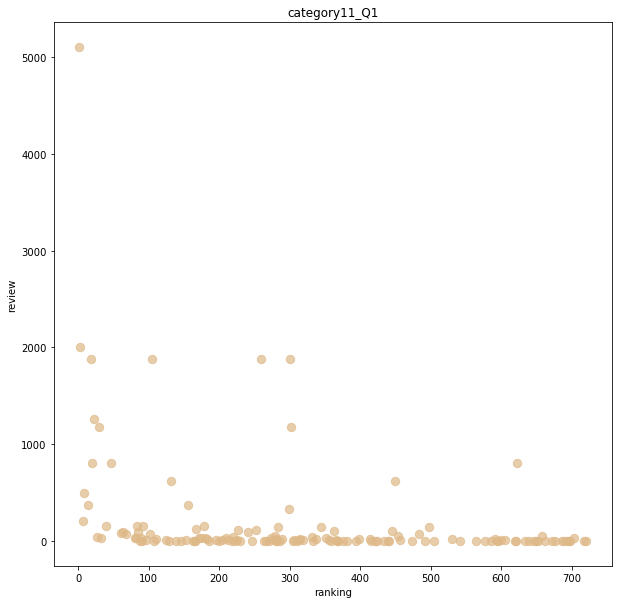

In [40]:
# Q1 

df = ca1_price_df_label1

plt.figure(figsize=(10, 10))

plt.scatter(df["ranking"], df["review"], color='#deb887', s=70, alpha=0.7)

plt.xlabel("ranking")
plt.ylabel("review")

plt.title("category11_Q1")

plt.gca().set_facecolor('#00ff0000')

plt.show()